<p align="center">
    <!-- <a href=https://mybinder.org/v2/gh/LineaLabs/demos/main?labpath=story%2Fclean_up_a_messy_notebook%2Fclean_up_a_messy_notebook.ipynb><img src="https://mybinder.org/badge_logo.svg" alt="Open in Binder"/></a> -->
    <a href="https://colab.research.google.com/github/LineaLabs/demos/blob/main/story/clean_up_a_messy_notebook/clean_up_a_messy_notebook.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>
</p>

In [ ]:
%%capture

# This cell only runs if you are running the notebook from Google Colab.
# Colab uses an old version of IPython (`5.5.0` from 2017) that is not 
# compatible with LineaPy. Hence, we need to upgrade it first. 
# You can ignore the message "Your session crashed for an unknown reason" 
# at the bottom of the screen. We triggered the runtime restart with `exit()`.

import IPython
import os
if (IPython.version_info[0] < 7) and any([k for k in dict(os.environ).keys() if k.startswith('COLAB_)')]):
  !pip -q install ipython --upgrade
  # To load the updated ipython that we have just installed, 
  # we need to restart the runtime. The exit() command allows 
  # us to stop the current runtime, and executing the cell after 
  # it would restart the runtime.
  exit()
  # this is to allow for colab runtime to restart before trying to 
  # execute the next cell.

We now install and load LineaPy, along with other packages.

In [ ]:
%%capture
!pip -q install lineapy scikit-learn pandas matplotlib

In [ ]:
%load_ext lineapy

In [2]:
import lineapy

# Use LineaPy to Clean up Messy Notebooks

## Scenario

As a data scientist using the Jupyter notebook day-to-day, we embrace non-linear workflows, i.e., jumping around between cells, deleting cells, editing cells, and executing the same cell multiple times until we think we have some good results or "[artifacts](https://docs.lineapy.org/en/latest/fundamentals/concepts.html#artifact)" (e.g., tables, models, charts). Finally, we share our results and notebook with our colleagues/supervisors/stakeholders to declare victory.

## What might happen next?

With the highly dynamic, non-leaner workflows in notebooks, any of the following may happen:

* We spend some time reorganizing all the non-linear operations we performed in the notebook and wrapping everything into a script or different modules so we can reuse or share the logic in the future.
* Our colleague try to rerun our notebook but cannot reproduce our result.
* We forget this notebook. Several months from now, our supervisor asks us to rerun the notebook with the latest data but we do not remember the exact steps to produce the previous result.
* We hand over the notebook to our ML engineers to productionize our work but they can only guess what exactly happened when we created the notebook.

The common pattern here is that someone (data scientist, data engineer, or ML engineer) needs to spend the time to go through non-sequential notebook cell operations and extract them into sequential code, which might be a lot of challenge or pain when notebooks become more complex.

Two normal ways to avoid these issues are:

* Keep the notebook in sequential operation by constantly re-executing the entire notebook from end to end during development.
* Version the notebook whenever there is a potential need for revisit in the future

However, constantly re-executing and versioning the entire notebook creates a huge burden for the notebook author and interrupts their thinking process, hence decreasing productivity.

## How can LineaPy help here?

With just two lines of code, LineaPy helps to remove the complexity of notebook productionization issues (code cleanup, versioning, etc.) from data scientists and ML engineers while having them continue to work with notebooks in their most familiar way.

```
import lineapy

........................
.
. your original notebook
.
........................

lineapy.save(object, 'artifact_name')
```

## What will we learn in rest of the notebook?

In this demo, we are going to load the iris data features as a four-column data frame and mutate it several times to mimic feature engineering processes during the data exploration phase.

Throughout the demo, we can save an artifact whenever we want, i.e., when we see something interesting but are not entirely sure if it is the final result we are looking for. So, we can have checkpoints and continue the exploration.

In the end, we will learn:

* How to use the `get_code()` method to extract cleaned-up code to create the artifact from a messy notebook.
* How to use the artifact store to see and retrieve different versions of the same artifact.

In sum, the demo will show that LineaPy can help data scientists and ML engineers save time on notebook cleanup and instead focus more on generating insights.

We strongly encourage you to try this notebook on your own and check out the official [documentation](https://docs.lineapy.org/en/latest/index.html) to learn more use cases of LineaPy.

## Demo

### Setup the demo

In [3]:
# Load modules and data 
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
import matplotlib.pyplot as plt

iris = load_iris()
df = pd.DataFrame(iris.data, columns=[x+'_1' for x in iris.feature_names])
df

NumExpr defaulting to 8 threads.

,sepal length (cm)_1,sepal width (cm)_1,petal length (cm)_1,petal width (cm)_1
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
# Run this cell first to add a checkpoint before we do any mutation on the dataframe.
# We can rerun this cell at any point of mutation process.
art = lineapy.save(df, 'fancy iris')

### Mutate the data

The following 3 cells all modify the dataframe `df` a little bit (for demo purpose). **Feel free to run them in any order, change parameters and re-execute them, or delete the cell** if you want to. To see how LineaPy can capture different versions, You can also save the same artifact multiple times by re-executing previous cells arbitrarily. We can compare these different versions of the same artifact at the end of the demo.

In [5]:
c1,c2,c3=0,0,0 # Count how many mutate we've down during the process

In [25]:
# Add new columns to the dataframe and print the column of the data frame

power = df.shape[1] //4
for col in iris.feature_names:
  df[col+f'_{power+1}'] = df[col+'_1']**(power+1)

clean_columnname = list([x.replace(' ','') for x in df.columns])

print(df.columns)
print(clean_columnname)

c1+=1

Index(['sepal length (cm)_1', 'sepal width (cm)_1', 'petal length (cm)_1',
       'petal width (cm)_1', 'sepal length (cm)_2', 'sepal width (cm)_2',
       'petal length (cm)_2', 'petal width (cm)_2', 'sepal length (cm)_3',
       'sepal width (cm)_3', 'petal length (cm)_3', 'petal width (cm)_3',
       'sepal length (cm)_4', 'sepal width (cm)_4', 'petal length (cm)_4',
       'petal width (cm)_4', 'sepal length (cm)_5', 'sepal width (cm)_5',
       'petal length (cm)_5', 'petal width (cm)_5'],
      dtype='object')
['sepallength(cm)_1', 'sepalwidth(cm)_1', 'petallength(cm)_1', 'petalwidth(cm)_1', 'sepallength(cm)_2', 'sepalwidth(cm)_2', 'petallength(cm)_2', 'petalwidth(cm)_2', 'sepallength(cm)_3', 'sepalwidth(cm)_3', 'petallength(cm)_3', 'petalwidth(cm)_3', 'sepallength(cm)_4', 'sepalwidth(cm)_4', 'petallength(cm)_4', 'petalwidth(cm)_4', 'sepallength(cm)_5', 'sepalwidth(cm)_5', 'petallength(cm)_5', 'petalwidth(cm)_5']


In [26]:
# Random sample 30 rows and concatenate with the original dataset and look at some statistics of the dataframe

df = pd.concat([df, df.sample(5, random_state=1111)])

print(df.shape)
print(df.describe().to_string())
print(df.head().to_string())

c2+=1

(191, 20)
       sepal length (cm)_1  sepal width (cm)_1  petal length (cm)_1  petal width (cm)_1  sepal length (cm)_2  sepal width (cm)_2  petal length (cm)_2  petal width (cm)_2  sepal length (cm)_3  sepal width (cm)_3  petal length (cm)_3  petal width (cm)_3  sepal length (cm)_4  sepal width (cm)_4  petal length (cm)_4  petal width (cm)_4  sepal length (cm)_5  sepal width (cm)_5  petal length (cm)_5  petal width (cm)_5
count           191.000000          191.000000           191.000000          191.000000           191.000000          191.000000           191.000000          191.000000           191.000000          191.000000           191.000000          191.000000           191.000000          191.000000           191.000000          191.000000           191.000000          191.000000           191.000000          191.000000
mean              7.851838            4.091852             5.075525            1.624954            46.930360           12.752098            23.444517         

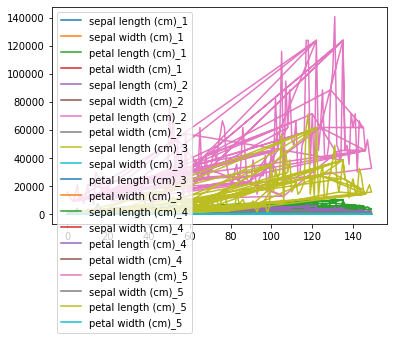

In [31]:
# Random sample and concatenate with the original dataset and do some strange scaling and do some plotting

df = pd.concat([df, df.sample(10)])
df = df*0.96
df.plot()
c3+=1

### Save the artifact

Once we are happy with the result or we think we found something interesting that we want to keep as a checkpoint for future investigation, all we need to do is to run `lineapy.save(df, 'fancy iris')` to save the data frame as an artifact.

In [32]:
art = lineapy.save(df, 'fancy iris')
print(f'we have ran {c1} type1 mutation, {c2} type2 mutation and {c3} type3 mutation')

we have ran 4 type1 mutation, 7 type2 mutation and 9 type3 mutation


### LineaPy feature: code cleanup

With `artifact.get_code()`, we can see cleaned-up code for a given artifact. 

Note that `artifact.get_code()` not only removes extraneous code for generating the artifact but it also captures all mutated, deleted, or re-executed code. **This is why we may see the result from `artifact.get_code()` different from the existing cells.**

In [33]:
print(art.get_code()) 

import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=[x + "_1" for x in iris.feature_names])
power = df.shape[1] // 4
for col in iris.feature_names:
    df[col + f"_{power+1}"] = df[col + "_1"] ** (power + 1)
df = pd.concat([df, df.sample(5, random_state=1111)])
df = pd.concat([df, df.sample(1)])
df = df * 1.05
df = pd.concat([df, df.sample(1)])
df = df * 1.05
df = pd.concat([df, df.sample(5, random_state=1111)])
df = pd.concat([df, df.sample(5, random_state=1111)])
df = pd.concat([df, df.sample(1)])
df = df * 1.05
power = df.shape[1] // 4
for col in iris.feature_names:
    df[col + f"_{power+1}"] = df[col + "_1"] ** (power + 1)
df = pd.concat([df, df.sample(5, random_state=1111)])
df = pd.concat([df, df.sample(1)])
df = df * 1.05
df = pd.concat([df, df.sample(1)])
df = df * 1.05
df = pd.concat([df, df.sample(5, random_state=1111)])
power = df.shape[1] // 4
for col in iris.feature_names:
    df[col + f"_{power+1}"] = df[col

In [35]:
# Look at value of a given artifact
# art.get_value()

If we need to validate correctness of the cleaned-up code, we can use `artifact.get_session_code()` to check the original full session code.

In [ ]:
print(art.get_session_code()) 

import lineapy
get_ipython().run_cell_magic('capture', '', "%matplotlib inline\n\nfrom sklearn.datasets import load_iris\nfrom sklearn.decomposition import PCA\nfrom sklearn.discriminant_analysis import LinearDiscriminantAnalysis\nimport pandas as pd\nimport matplotlib.pyplot as plt\n\niris = load_iris()\ndf = pd.DataFrame(iris.data, columns=[x+'_1' for x in iris.feature_names])\n")
get_ipython().run_line_magic('matplotlib', 'inline')

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
import matplotlib.pyplot as plt

iris = load_iris()
df = pd.DataFrame(iris.data, columns=[x+'_1' for x in iris.feature_names])
# Load modules and data 
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
import matplotlib.pyplot as plt

iris = load_iris()
df = pd.DataFrame(iris.d

### LineaPy feature: artifact store

Another pain point of using Jupyter notebook is that we might have accidentally deleted or mutated a cell that we want to roll back later on.

With the option to make a checkpoint at any moment (with `lineapy.save()`) and auto-version the artifact within the artifact store, we can easily recover overwritten artifacts without any manual cleanup or versioning. This can help us effectively compare different versions of the same artifact (i.e., both code and value) and understand what changed over time. It can also help us to easily pick and expand on ideas we have put behind before.

In [36]:
# Access to the LineaPy artifact store.

catalog = lineapy.catalog()
print('artifact within the catalog\n', catalog, '\n')

# Keep only the artifacts we are interested in and show their versions
versions = [x._version for x in catalog.artifacts if x.name=='fancy iris']
first_version, latest_version = versions[0], versions[-1]
print('fancy iris with following versions\n', versions)

artifact within the catalog
 iris agg:0 created on 2022-05-11 21:14:36.983841
fancy iris:0 created on 2022-05-12 13:28:45.654395
fancy iris:1 created on 2022-05-12 13:30:19.153434
fancy iris:2 created on 2022-05-12 14:34:12.386935
fancy iris:3 created on 2022-05-12 14:34:32.628335
fancy iris:4 created on 2022-05-12 14:34:42.339116
fancy iris:5 created on 2022-05-12 14:35:48.013494
fancy iris:6 created on 2022-05-12 14:36:15.938441 

fancy iris with following versions
 [0, 1, 2, 3, 4, 5, 6]


In [37]:
# Code for first version of artifact
print(lineapy.get('fancy iris', version=first_version).get_code())

import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=[x + "_1" for x in iris.feature_names])
power = df.shape[1] // 4
for col in iris.feature_names:
    df[col + f"_{power+1}"] = df[col + "_1"] ** (power + 1)
df = pd.concat([df, df.sample(5, random_state=1111)])
df = pd.concat([df, df.sample(1)])
df = df * 1.05
df = pd.concat([df, df.sample(1)])
df = df * 1.05
df = pd.concat([df, df.sample(5, random_state=1111)])
df = pd.concat([df, df.sample(5, random_state=1111)])
df = pd.concat([df, df.sample(1)])
df = df * 1.05
power = df.shape[1] // 4
for col in iris.feature_names:
    df[col + f"_{power+1}"] = df[col + "_1"] ** (power + 1)
df = pd.concat([df, df.sample(5, random_state=1111)])
df = pd.concat([df, df.sample(1)])
df = df * 1.05
df = pd.concat([df, df.sample(1)])
df = df * 1.05
df = pd.concat([df, df.sample(5, random_state=1111)])
power = df.shape[1] // 4
for col in iris.feature_names:
    df[col + f"_{power+1}"] = df[col

In [38]:
# Code for last version of artifact
latest_version = versions[-1]
print(lineapy.get('fancy iris', version=latest_version).get_code())

import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=[x + "_1" for x in iris.feature_names])
power = df.shape[1] // 4
for col in iris.feature_names:
    df[col + f"_{power+1}"] = df[col + "_1"] ** (power + 1)
df = pd.concat([df, df.sample(5, random_state=1111)])
df = pd.concat([df, df.sample(1)])
df = df * 1.05
df = pd.concat([df, df.sample(1)])
df = df * 1.05
df = pd.concat([df, df.sample(5, random_state=1111)])
df = pd.concat([df, df.sample(5, random_state=1111)])
df = pd.concat([df, df.sample(1)])
df = df * 1.05
power = df.shape[1] // 4
for col in iris.feature_names:
    df[col + f"_{power+1}"] = df[col + "_1"] ** (power + 1)
df = pd.concat([df, df.sample(5, random_state=1111)])
df = pd.concat([df, df.sample(1)])
df = df * 1.05
df = pd.concat([df, df.sample(1)])
df = df * 1.05
df = pd.concat([df, df.sample(5, random_state=1111)])
power = df.shape[1] // 4
for col in iris.feature_names:
    df[col + f"_{power+1}"] = df[col

All the complexity of notebook cleaning has been removed here. Even when you want to further refactor or modularize the code, you will no longer need to start from scratch.

## Recap

This demo has shown that LineaPy can help data scientists and ML engineers save time on manual notebook cleanup, which is often a major bottleneck in data science workflows. Hence, they can focus on more valuable activities such as generating insights from the data.

To learn more about LineaPy, check out the project [documentation](https://docs.lineapy.org/en/latest/index.html).